In [42]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [43]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [44]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [45]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [46]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [47]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [48]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [49]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [50]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first().date

'2017-08-23'

<function matplotlib.pyplot.show(close=None, block=None)>

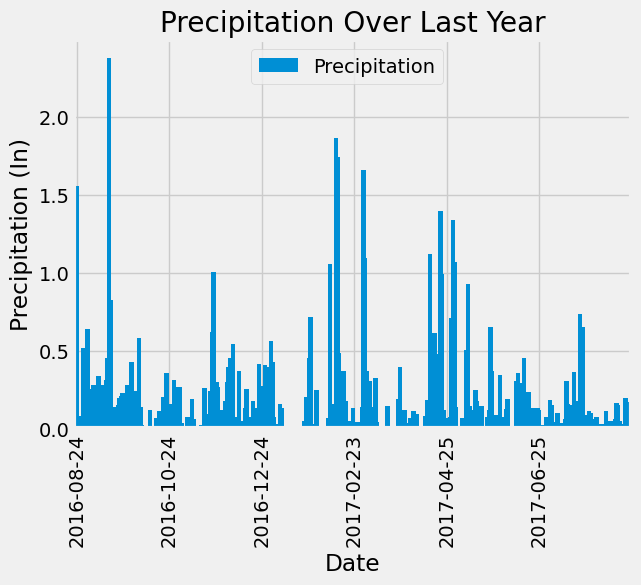

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date
# Calculate the date one year from the last date in data set.
last_year = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_year

# Perform a query to retrieve the data and precipitation scores
precip_results = session.query(measurement.date, func.avg(measurement.prcp)).\
                    filter(measurement.date >= last_year).\
                    group_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_results, columns=['Date', 'Precipitation'])


# Sort the dataframe by date
precip_df.set_index('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
ax = precip_df.plot(kind='bar', width=3)
plt.locator_params(axis='x', nbins=6)
ax.tick_params(axis='y')
ax.grid(True)
plt.legend(bbox_to_anchor=(.3,1))
plt.title("Precipitation Over Last Year")
plt.ylabel("Precipitation (In)")
plt.xlabel("Date")
plt.show

In [60]:
plt.savefig("Precipitation.png")

<Figure size 640x480 with 0 Axes>

In [52]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [53]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

9

In [54]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_results = session.query(measurement.station, func.count(measurement.station)).\
            group_by(measurement.station).\
            order_by(func.count(measurement.station).desc()).all()
station_results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [55]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = station_results[0][0]
session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
                filter(measurement.station == active_station).all()

[(54.0, 71.66378066378067, 85.0)]

In [56]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_results = session.query(measurement.station, measurement.tobs).\
                filter(measurement.station == active_station).\
                filter(measurement.date >= last_year).all()
tobs_df = pd.DataFrame(tobs_results)
tobs_df.set_index('station', inplace=True)
tobs_df.head()


,tobs
station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0


<function matplotlib.pyplot.show(close=None, block=None)>

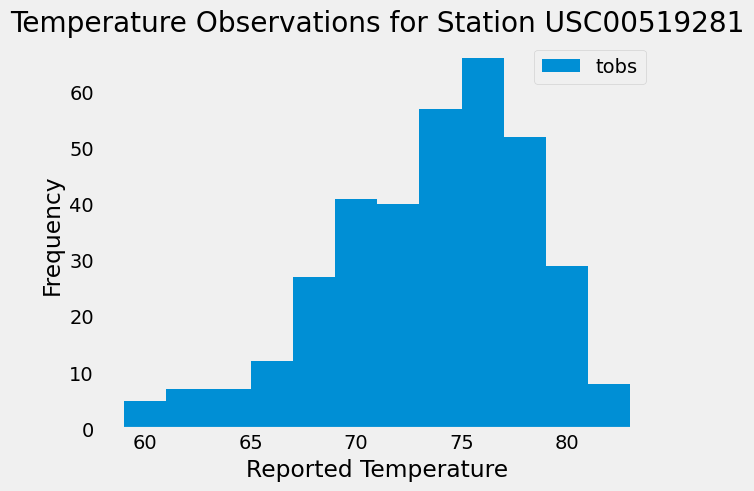

In [57]:
tobs_df.plot.hist(bins=12)
plt.grid()
plt.title("Temperature Observations for Station " + active_station)
plt.xlabel("Reported Temperature")
plt.legend(bbox_to_anchor=(1,1))
plt.show

In [61]:
plt.savefig("StationTemps.png")

<Figure size 640x480 with 0 Axes>

# Close Session

In [58]:
# Close Session
session.close()